This code seeks to use the Forward Difference method to calculate the Traffic Flow rate since the math is identical to a 1 Dimensional Non-linear Convection equation

The Difference is that, compared to the Module 2 Notebooks 1 and 2, instead of U (the wave) I am modeling Density, and the Euler Equation is different because of no velocity. Additionally, I am writing this code in order to get values of Velocity, so I must further relate the Density to the velocity using the Traffic Flux Relationship

In [413]:
import numpy as NPY
import math
from matplotlib import pyplot
%matplotlib inline

In [414]:
#This cell lets me define the mathematical relationship for Traffic Flux as a function of a Density variable and 
#an input Maximum Speed. I could have made the Maximum density a input variable too instead of hard wiring it in but
#it seems for part B I only need to change max velocity

def Traffic_Flux(density_input, Max_Speed):
    V_max=Max_Speed
    Density_max=250
    
    Output_flux= V_max*density_input*(1-(density_input/Density_max))
    return Output_flux

In [415]:
#This code actually uses the "Forward Difference" method, (nested in the first for loop). It will call upon my 
#previous Traffic Flux function so I must have the input Max Velocity kept as an input as well. 

def Traffic_Flow_Math(nx, nt, Max_Speed):
  
    #Initial Conditions
    
    Road_length=11                      #Length of the 1D Road in km
    delta_t = 0.001                     #This is my timestep duration, in hours
    ro=10
    
    
    x=NPY.linspace(0, Road_length,nx)    #Creates an array to hold my X-values for graphing and steping in length
    x_steps=Road_length/nx               #gives me my "delta_X" 
    
    velocity_float=NPY.ones(nx)*0        #an array to hold values for velocity as they are calculated, initially zeros
    velocity_float_n=NPY.ones(nx)*0      #another array to hold values for velocity as they are calculated
   
    Density_variable=NPY.ones(nx)*10     #an array to hold all of my density variables as I step through X and time.
    Density_variable[10:20]=50           #sets up the initial condition for my "Density wave"
    
   
    for i in range(nt):
        
        Density_variable_n=Density_variable.copy()
        
        for j in range(1, nx):
            
            Density_variable[j]=Density_variable[j]-(delta_t /x_steps)*(Traffic_Flux(Density_variable[j],Max_Speed)-Traffic_Flux(Density_variable[j-1],Max_Speed))
            Density_variable[0]=ro      #boundary condition
            
        for j in range (nx):
             velocity_float[j]=Traffic_Flux(Density_variable[j],Max_Speed)/Density_variable[j]
                
        for j in range (nx):
            velocity_float_n[j]=Traffic_Flux(Density_variable_n[j],Max_Speed)/Density_variable_n[j]
            
    pyplot.figure
    pyplot.plot(x, velocity_float)
    pyplot.show()
    
    return Density_variable, velocity_float, Density_variable_n, velocity_float_n


In [416]:
def Time_Conversion(Time_in_minutes):
    Time_in_hours=Time_in_minutes/60
    Converted_function_timestep_spot = Time_in_hours/0.001
    return Converted_function_timestep_spot


In [417]:
print(Time_Conversion(0.1))       #Lets me figure out what to enter as nt, rounded to integer

1.6666666666666667


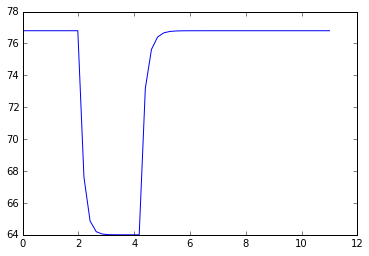

17.7777777778


In [418]:
Max_Velocity=80
r, v, rn, vn = Traffic_Flow_Math(51, 1, Max_Velocity)
Min_Vel_in_meters_per_second= min(vn)*1000/3600       #Converting from km/hr to m/sec
print(Min_Vel_in_meters_per_second)                


In [419]:
print(Time_Conversion(3))   #what NT do I need to enter for 3 minutes

50.0


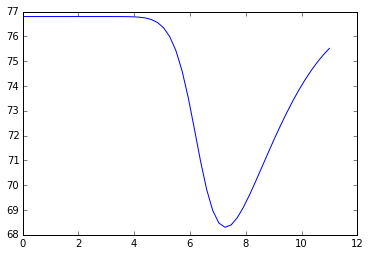

20.629589129


In [420]:
Max_Velocity=80
r, v, rn, vn = Traffic_Flow_Math(51, 50, Max_Velocity)
Average_Velocity=(sum(v)/51)*1000/3600
print(Average_Velocity)

In [421]:
print(Time_Conversion(6))  #what NT do I need to enter for 6 minutes

100.0


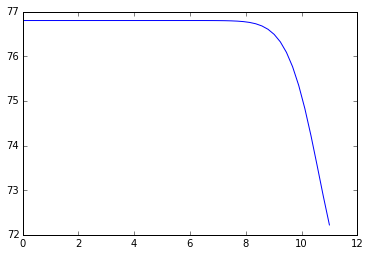

In [422]:
Max_Velocity=80
r, v, rn, vn = Traffic_Flow_Math(51, 100, Max_Velocity)

In [423]:
Min_Vel_in_meters_per_second= min(vn)*1000/3600       #Converting from km/hr to m/sec
print(Min_Vel_in_meters_per_second) 

19.9843035468


In [424]:
def Traffic_Flow_Math(nx, nt, Max_Speed):
  
    #Initial Conditions
    
    Road_length=11                      #Length of the 1D Road in km
    delta_t = 0.001                     #This is my timestep duration, in hours
    ro=20
    
    
    x=NPY.linspace(0, Road_length,nx)    #Creates an array to hold my X-values for graphing and steping in length
    x_steps=Road_length/nx               #gives me my "delta_X" 
    
    velocity_float=NPY.ones(nx)*0        #an array to hold values for velocity as they are calculated, initially zeros
    velocity_float_n=NPY.ones(nx)*0      #another array to hold values for velocity as they are calculated
   
    Density_variable=NPY.ones(nx)*20     #an array to hold all of my density variables as I step through X and time.
    Density_variable[10:20]=50           #sets up the initial condition for my "Density wave"
    
   
    for i in range(nt):
        
        Density_variable_n=Density_variable.copy()
        
        for j in range(1, nx):
            
            Density_variable[j]=Density_variable[j]-(delta_t /x_steps)*(Traffic_Flux(Density_variable[j],Max_Speed)-Traffic_Flux(Density_variable[j-1],Max_Speed))
            Density_variable[0]=ro      #boundary condition
            
        for j in range (nx):
             velocity_float[j]=Traffic_Flux(Density_variable[j],Max_Speed)/Density_variable[j]
                
        for j in range (nx):
            velocity_float_n[j]=Traffic_Flux(Density_variable_n[j],Max_Speed)/Density_variable_n[j]
            
    pyplot.figure
    pyplot.plot(x, velocity_float)
    pyplot.show()
    
    return Density_variable, velocity_float, Density_variable_n, velocity_float_n


In [425]:
print(Time_Conversion(0.1))   #what NT do I need to enter for 0 minutes

1.6666666666666667


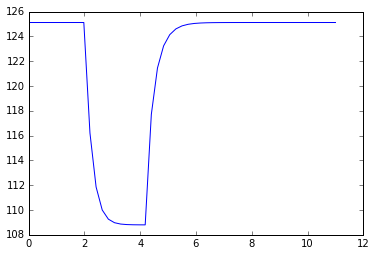

30.2222222222


In [426]:
Max_Velocity=136
r, v, rn, vn = Traffic_Flow_Math(51, 1, Max_Velocity)
Min_Vel_in_meters_per_second= min(vn)*1000/3600       #Converting from km/hr to m/sec
print(Min_Vel_in_meters_per_second) 

In [427]:
print(Time_Conversion(3))    #what NT do I need to enter for 3 minutes

50.0


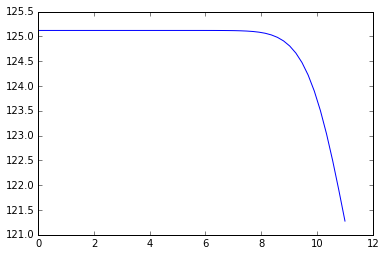

34.6601553711


In [428]:
Max_Velocity=136
r, v, rn, vn = Traffic_Flow_Math(51, 50, Max_Velocity)
Average_Velocity=(sum(v)/51)*1000/3600
print(Average_Velocity)

In [429]:
print(Time_Conversion(3))  #what NT do I need to enter for 3 minutes

50.0


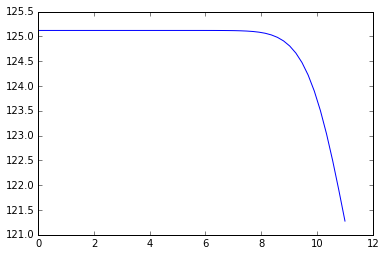

33.5190774044


In [430]:
Max_Velocity=136
r, v, rn, vn = Traffic_Flow_Math(51, 50, Max_Velocity)
Min_Vel_in_meters_per_second= min(vn)*1000/3600       #Converting from km/hr to m/sec
print(Min_Vel_in_meters_per_second) 